# Example with Korg-based grid interpolator

In [1]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.plots import plot_3D
from spice.spectrum import simulate_observed_flux
import astropy.units as u
import jax.numpy as jnp
from transformer_payne import Blackbody
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from jax import config

from spice.spectrum.spectrum_korg import KorgSpectrumEmulator

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Gaia:G" has a newer version available.  Run phoebe.list_passband_online_history("Gaia:G") to get a list of available changes and phoebe.update_passband("Gaia:G") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


ImportError: cannot import name 'BaseSpectrum' from 'spice.spectrum.spectrum' (/home/100/mj8805/scr/mj8805/miniconda3/envs/astro/lib/python3.12/site-packages/spice/spectrum/spectrum.py)

Let's define a ```KorgSpectrumEmulator``` as with other types of spectra models. This emulator is based on a ```RegularGridInterpolator``` and interpolates between the corresponding ranges of parameters:


In [2]:
k = KorgSpectrumEmulator()
b = Blackbody()

**Note**: the first execution of ```intensity``` will most probably take some time. After it's compiled with ```jax.jit```, it will be much faster.

In [3]:
import jax.numpy as jnp
wavelengths = jnp.linspace(5600, 6000, 1000)
intensities = k.intensity(jnp.log10(wavelengths), 0.5, jnp.array([5777, 4.44, 0.0]))
bl = b.intensity(jnp.log10(wavelengths), 0.5, jnp.array(5777.))

In [4]:
intensities.shape

(1000, 2)

In [5]:
bl.shape

(1000, 2)

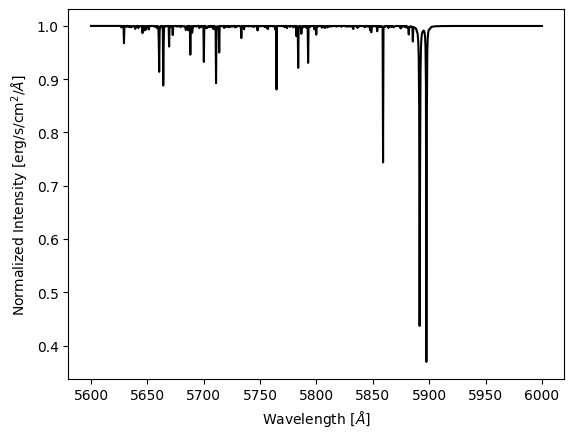

In [6]:
plt.plot(wavelengths, intensities[:, 0], color='black')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Normalized Intensity [erg/s/cm$^2$/$\AA$]')
plt.show()


# An example with a Mesh Model

In [7]:
base_temp = 5700
spot_temp = 15000

m = IcosphereModel.construct(1000, 1., 1., k.to_parameters(dict(teff=base_temp)), k.stellar_parameter_names)

m = add_rotation(m, rotation_velocity=50.)
m_rotated = evaluate_rotation(m, 0.)

In [8]:
rotated_spec = simulate_observed_flux(b.intensity, m_rotated, jnp.log10(wavelengths))

In [9]:
rotated_spec = simulate_observed_flux(k.intensity, m_rotated, jnp.log10(wavelengths))